<a href="https://colab.research.google.com/github/Swanimadhoop/ML_Algorithm/blob/main/MLAlgorithm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **queston 1**

In [ ]:
#question 1


import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset from TensorFlow
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
X = X / 255.0
X_test = X_test / 255.0

# Flatten images (convert from 28x28 to 784 features)
X = X.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Apply one-hot encoding to labels
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split dataset into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (48000, 784) (48000, 10)
Validation set: (12000, 784) (12000, 10)
Test set: (10000, 784) (10000, 10)


# **Question 2**

✅ Data ready: (48000, 784) (12000, 784) (10000, 784)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Logistic Regression model trained!

📊 Validation Set Performance:
Accuracy: 0.92225
Precision: 0.9220599472011989
Recall: 0.92225
F1 Score: 0.9220994000466887
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✨ Best Params: {'C': 1, 'solver': 'lbfgs'}

📝 Test Set Performance (Best Model):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.87      0.88       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


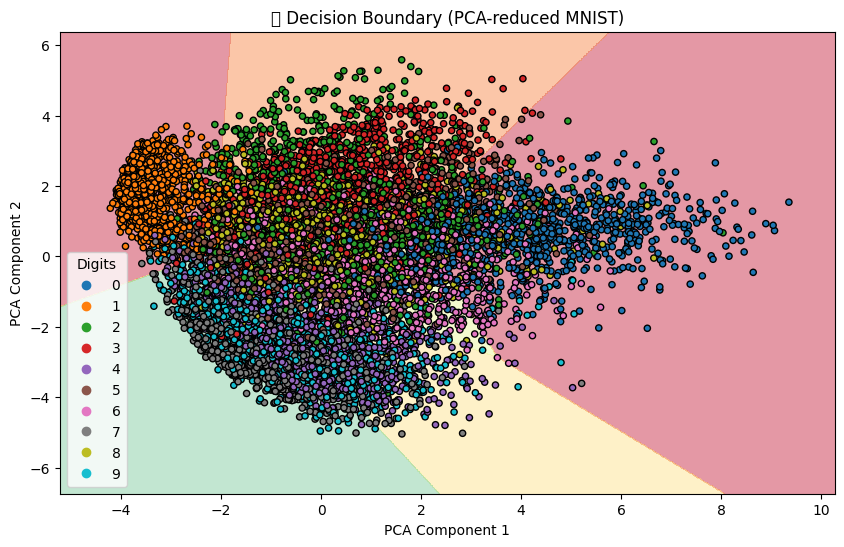

In [ ]:
#question 2


# 📚 Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import tensorflow as tf

# a) 🔄 **Load and preprocess the dataset**
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# Split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("✅ Data ready:", X_train.shape, X_val.shape, X_test.shape)

# a) 🚀 **Logistic Regression model**
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
print("✅ Logistic Regression model trained!")

# b) 🏃 **Evaluate Model Performance**
y_val_pred = model.predict(X_val)
print("\n📊 Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

# c) 🔧 **Hyperparameter Tuning with Grid Search CV**
# param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga'], 'max_iter': [1000]}
param_grid = {'C': [1, 10], 'solver': ['lbfgs']}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\n✨ Best Params:", grid_search.best_params_)

# Evaluate best model
y_test_best_pred = best_model.predict(X_test)
print("\n📝 Test Set Performance (Best Model):")
print(classification_report(y_test, y_test_best_pred))

# d) 🎨 **Visualize Decision Boundary (using PCA for 2D projection)**
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain best model on PCA data
best_model_pca = LogisticRegression(C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver'], max_iter=1000)
best_model_pca.fit(X_train_pca, y_train)

# Create decision boundary plot
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.tab10, edgecolor='k', s=20)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("🌈 Decision Boundary (PCA-reduced MNIST)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# **Question 3**

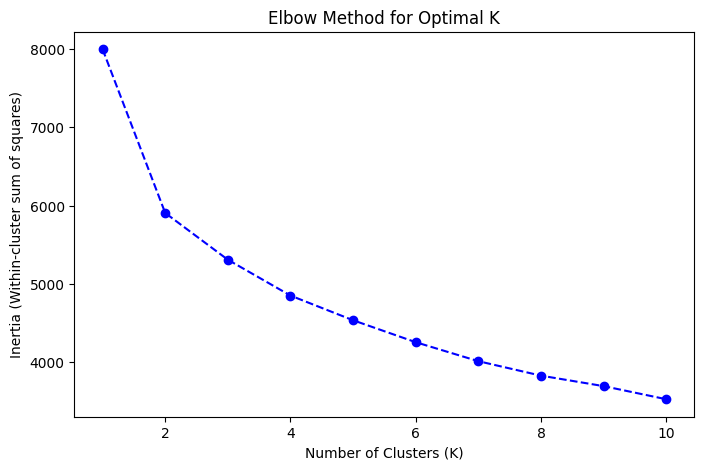


📊 Cluster Characteristics (Mean Values):
           Gender  Product line       Total  Customer type   Payment  \
Cluster                                                                
0        0.530055      2.786885  411.638213       0.000000  1.021858   
1        1.000000      2.504902  194.976147       1.000000  1.088235   
2        0.461111      2.466667  740.593000       0.594444  0.977778   
3        0.469388      2.334694  127.700829       0.000000  0.979592   
4        0.000000      2.207447  230.150952       1.000000  0.936170   

         Unit price  Quantity  gross income  
Cluster                                      
0         64.819945  6.606557     19.601820  
1         48.604951  4.328431      9.284578  
2         82.923333  8.588889     35.266333  
3         41.382122  3.759184      6.080992  
4         46.967287  5.058511     10.959569  


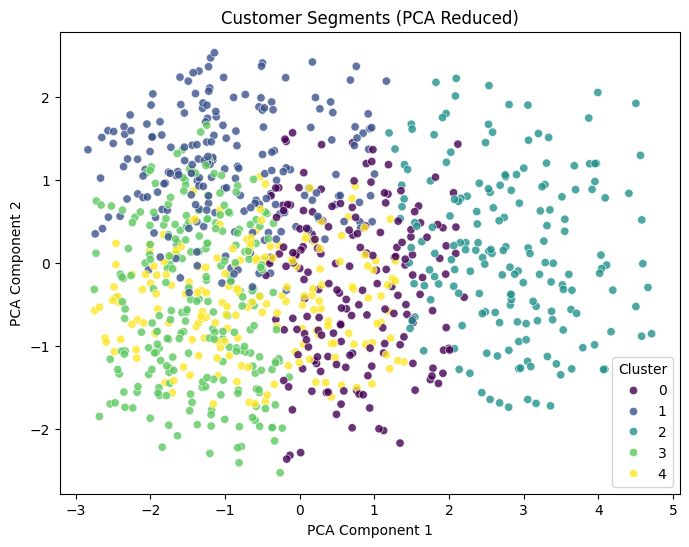

In [ ]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# a) 🔄 **Load and Preprocess Data**
file_path = "/content/supermarket_sales - Sheet1.csv"  # Ensure correct file path in Colab
df = pd.read_csv(file_path)

# Selecting relevant features (purchase history + demographics)
df = df[['Gender', 'Product line', 'Total', 'Customer type', 'Payment', 'Unit price', 'Quantity', 'gross income']]

# Encoding categorical variables
encoder = LabelEncoder()
for col in ['Gender', 'Product line', 'Customer type', 'Payment']:
    df[col] = encoder.fit_transform(df[col])

# Standardizing numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# b) 🔍 **Determine Optimal Number of Clusters using Elbow Method**
inertia = []
K_range = range(1, 11)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# 🚀 Applying K-Means with Optimal K (choose based on elbow graph)
optimal_k = 5  # Adjust based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# c) 📊 **Analyze Cluster Characteristics**
cluster_summary = df.groupby('Cluster').mean()
print("\n📊 Cluster Characteristics (Mean Values):")
print(cluster_summary)

# d) 🎨 **Visualizing Clusters using PCA**
pca = PCA(n_components=2)  # Reduce dimensions for visualization
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.8)
plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# **Question 4**

✅ Dataset Loaded & Split: (120, 4) (30, 4)


<Figure size 800x600 with 0 Axes>

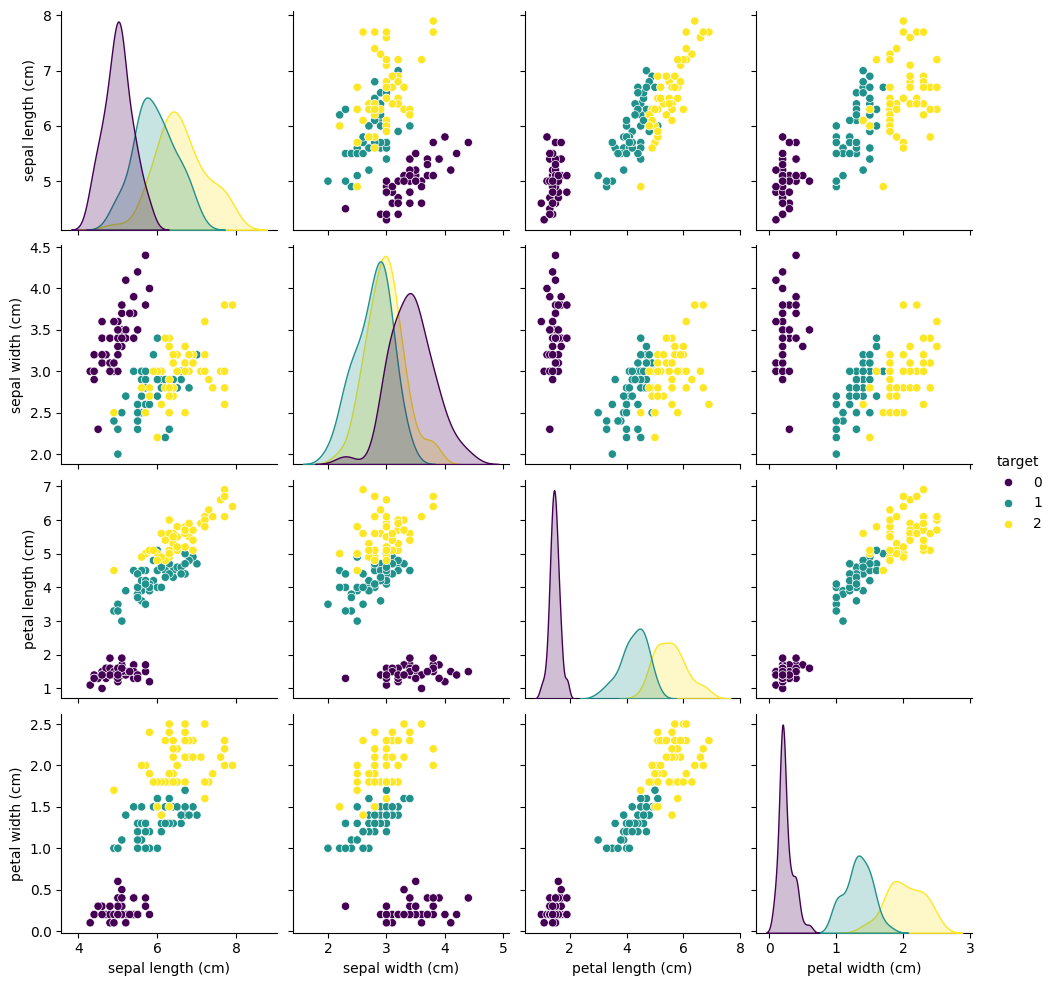

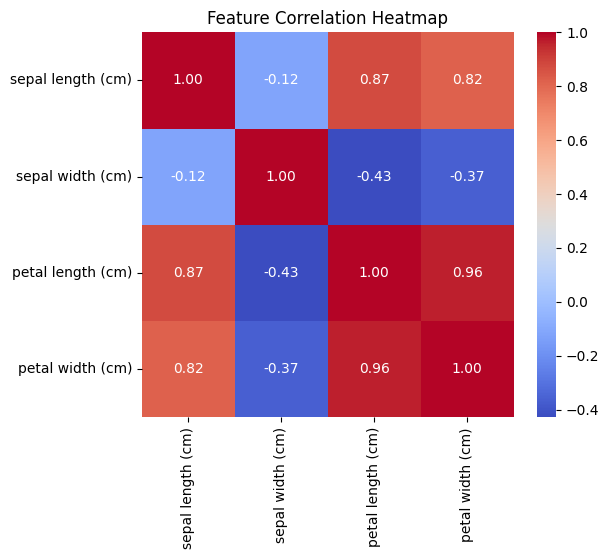


🔹 Selected Features (Univariate): ['petal length (cm)', 'petal width (cm)']

🔥 Feature Importance (Random Forest):
              Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387

🔹 Selected Features (RFE): ['petal length (cm)', 'petal width (cm)']

✅ Model Performance Comparison:
🔹 Accuracy with All Features: 1.0000
🔹 Accuracy with Selected Features (RFE): 1.0000

📊 Classification Report (All Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📊 Classification Report (Selected Features - RFE):
              precision    recall  f1-score   support

 

In [ ]:
#question 4


#  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report

# a)  **Load and Split Iris Dataset**
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Target labels (setosa, versicolor, virginica)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(" Dataset Loaded & Split:", X_train.shape, X_test.shape)

# b)  **Exploratory Data Analysis (EDA)**
plt.figure(figsize=(8, 6))
sns.pairplot(pd.concat([X, pd.DataFrame(y, columns=['target'])], axis=1), hue='target', palette='viridis')
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(6, 5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# c)  **Feature Selection Techniques**

# (i) Univariate Feature Selection (SelectKBest with ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)
selected_features_kbest = X.columns[selector.get_support()]
print("\n Selected Features (Univariate):", selected_features_kbest.tolist())

# (ii) Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\n Feature Importance (Random Forest):\n", feature_importance)

# (iii) Recursive Feature Elimination (RFE) using SVM
svm = SVC(kernel="linear")
rfe = RFE(svm, n_features_to_select=2)
rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]
print("\n Selected Features (RFE):", selected_features_rfe.tolist())

# d)  **Train a Classification Model (SVM) with Selected Features**
svm_model = SVC(kernel="linear")

# Train on all features (baseline model)
svm_model.fit(X_train, y_train)
y_pred_all = svm_model.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Train on selected features from RFE
svm_model.fit(X_train[selected_features_rfe], y_train)
y_pred_rfe = svm_model.predict(X_test[selected_features_rfe])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# e)  **Compare Model Performance Before & After Feature Selection**
print("\n Model Performance Comparison:")
print(f" Accuracy with All Features: {accuracy_all:.4f}")
print(f" Accuracy with Selected Features (RFE): {accuracy_rfe:.4f}")

# Display classification report
print("\n Classification Report (All Features):")
print(classification_report(y_test, y_pred_all))

print("\n Classification Report (Selected Features - RFE):")
print(classification_report(y_test, y_pred_rfe))


# **Question 5**


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

📌 First Few Rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

📊 Frequent Itemsets:
      support                                           itemsets
0    0.078502                                         (UHT-milk)
1    0.031042                                    (baking powder)
2    0.119548                                             (beef)
3    0.079

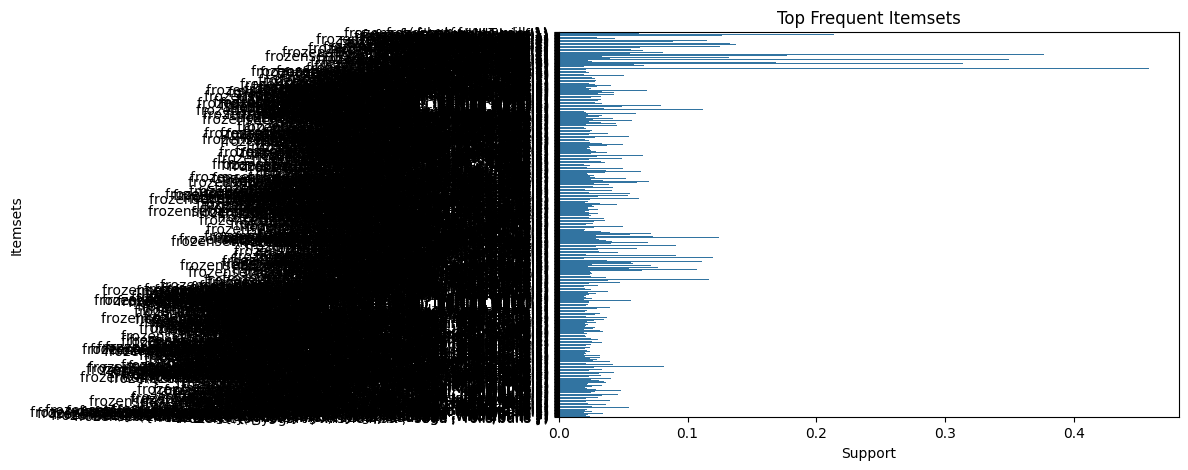

In [ ]:
#  Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#  (b) **Load the Dataset**
file_path = "/content/Groceries_dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# 🔍 (c) **Examine the Structure of the Dataset**
print("\n📌 Dataset Info:")
print(df.info())

print("\n📌 First Few Rows:")
print(df.head())

# 🔄 (a) **Preprocessing: Convert Transactions into List Format**
# Group transactions by 'Member_number' to get all items bought together
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# ✅ Convert transactions into a format suitable for Apriori
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# ✅ Apply Apriori Algorithm to find Frequent Itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print("\n📊 Frequent Itemsets:")
print(frequent_itemsets)

# ✅ Extract Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\n📌 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


# d) 📈 **Visualizing Frequent Itemsets**
plt.figure(figsize=(8, 5))
sns.barplot(x=frequent_itemsets['support'], y=frequent_itemsets['itemsets'].astype(str))
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top Frequent Itemsets")
plt.show()


In [ ]:
# 📚 Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# ✅ Load the Dataset
file_path = "/content/Groceries_dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# 🔍 Check the structure
print("\n📌 First Few Rows:")
print(df.head())

# 🔄 **Convert Transactions into List Format**
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# ✅ (a) Function to Generate Individual Itemsets
def generate_itemsets(transactions):
    """Generate individual itemsets from the dataset."""
    itemsets = {}
    for transaction in transactions:
        for item in transaction:
            if item in itemsets:
                itemsets[item] += 1
            else:
                itemsets[item] = 1
    return itemsets

itemsets = generate_itemsets(transactions)
print("\n✅ Individual Itemsets Generated:", len(itemsets))

# Convert to DataFrame
itemsets_df = pd.DataFrame(itemsets.items(), columns=['Item', 'Count'])

# ✅ (b) Calculate Support for Each Itemset
total_transactions = len(transactions)
itemsets_df['Support'] = itemsets_df['Count'] / total_transactions

# Display the itemsets with their support values
print("\n📊 Frequent Itemsets with Support:")
print(itemsets_df.sort_values(by="Support", ascending=False))



📌 First Few Rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

✅ Individual Itemsets Generated: 167

📊 Frequent Itemsets with Support:
                      Item  Count   Support
3               whole milk   2502  0.641868
23        other vegetables   1898  0.486916
16              rolls/buns   1716  0.440226
0                     soda   1514  0.388404
8                   yogurt   1334  0.342227
..                     ...    ...       ...
166        rubbing alcohol      5  0.001283
154                   bags      4  0.001026
156         baby cosmetics      3  0.000770
160        kitchen utensil      1  0.000257
155  preservation products      1  0.000257

[167 rows x 3 columns]


In [ ]:
#D

# 📚 Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# ✅ Load the Dataset
file_path = "/content/Groceries_dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# 🔄 **Convert Transactions into List Format**
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# ✅ Encode Transactions for Apriori
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# ✅ (b) Determine Minimum Support Threshold
min_support = 0.02  # You can adjust this threshold

# ✅ (a) Apply Apriori Algorithm to Identify Frequent Itemsets
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# 📊 Display Frequent Itemsets
print("\n📊 Frequent Itemsets (Support ≥ {:.2f}):".format(min_support))
print(frequent_itemsets.sort_values(by="support", ascending=False))



📊 Frequent Itemsets (Support ≥ 0.02):
      support                                   itemsets
85   0.458184                               (whole milk)
52   0.376603                         (other vegetables)
64   0.349666                               (rolls/buns)
73   0.313494                                     (soda)
86   0.282966                                   (yogurt)
..        ...                                        ...
749  0.020010  (newspapers, root vegetables, rolls/buns)
99   0.020010                        (frankfurter, beef)
100  0.020010                         (beef, newspapers)
680  0.020010            (yogurt, whole milk, chocolate)
691  0.020010        (citrus fruit, sausage, whole milk)

[894 rows x 2 columns]


In [ ]:
#E

# 📚 Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# ✅ Load the Dataset
file_path = "/content/Groceries_dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# 🔄 **Convert Transactions into List Format**
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# ✅ Encode Transactions for Apriori
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# ✅ Apply Apriori Algorithm to Identify Frequent Itemsets
min_support = 0.02  # Adjust the support threshold if needed
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# ✅ (a) Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# ✅ (b) Display Confidence for Each Rule
print("\n📊 Association Rules with Confidence:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# ✅ (c) Set a Minimum Confidence Threshold
min_confidence = 0.4  # Adjust as needed
filtered_rules = rules[rules['confidence'] >= min_confidence]

#  Display Meaningful Rules
print("\n Association Rules with Confidence ≥ {:.2f}:".format(min_confidence))
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



📊 Association Rules with Confidence:
                          antecedents               consequents   support  \
0                          (UHT-milk)        (other vegetables)  0.038994   
1                          (UHT-milk)              (rolls/buns)  0.031042   
2                          (UHT-milk)                    (soda)  0.027450   
3                          (UHT-milk)              (whole milk)  0.040534   
4                              (beef)        (other vegetables)  0.050795   
..                                ...                       ...       ...   
863                 (yogurt, sausage)  (rolls/buns, whole milk)  0.022832   
864        (yogurt, soda, whole milk)              (rolls/buns)  0.024628   
865  (yogurt, rolls/buns, whole milk)                    (soda)  0.024628   
866        (yogurt, soda, rolls/buns)              (whole milk)  0.024628   
867    (rolls/buns, soda, whole milk)                  (yogurt)  0.024628   

     confidence      lift  
0      0.

In [ ]:
#F

# 📚 Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#  Load the Dataset
file_path = "/content/Groceries_dataset.csv"  # Update with actual file path
df = pd.read_csv(file_path)

#  Convert Transactions into List Format
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

#  Encode Transactions for Apriori
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

#  Apply Apriori Algorithm to Identify Frequent Itemsets
min_support = 0.02  # Adjust as needed
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

#  Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

#  (a) Evaluate Rules Based on Support, Confidence, and Lift
print("\n Evaluating Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

#  (b) Identify High-Confidence Rules with Strong Lift Values
high_confidence = 0.6  # Adjust as needed
strong_lift = 1.5  # Minimum lift threshold

strong_rules = rules[(rules['confidence'] >= high_confidence) & (rules['lift'] >= strong_lift)]

print("\n High-Confidence Association Rules (Confidence ≥ {:.2f}, Lift ≥ {:.2f}):".format(high_confidence, strong_lift))
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



📊 Evaluating Association Rules:
                          antecedents               consequents   support  \
0                          (UHT-milk)        (other vegetables)  0.038994   
1                          (UHT-milk)              (rolls/buns)  0.031042   
2                          (UHT-milk)                    (soda)  0.027450   
3                          (UHT-milk)              (whole milk)  0.040534   
4                              (beef)        (other vegetables)  0.050795   
..                                ...                       ...       ...   
863                 (yogurt, sausage)  (rolls/buns, whole milk)  0.022832   
864        (yogurt, soda, whole milk)              (rolls/buns)  0.024628   
865  (yogurt, rolls/buns, whole milk)                    (soda)  0.024628   
866        (yogurt, soda, rolls/buns)              (whole milk)  0.024628   
867    (rolls/buns, soda, whole milk)                  (yogurt)  0.024628   

     confidence      lift  
0      0.49673

# **`Question 6`**

In [ ]:
movie_data_path = '/content/ratings_small.csv'
movie_data = pd.read_csv(movie_data_path)
movie_data.drop('timestamp', axis=1, inplace=True)
unique_movies = movie_data['movieId'].unique()
uniique_users = movie_data['userId'].unique()

print(movie_data.head())
print(f'SHAPE : {movie_data.shape}')
print(f'DESCRIPTION : \n{movie_data.describe()}')
print(f'INFO : \n{movie_data.info()}')
print(f'Total Unique Movies : {len(unique_movies)}')
print(f'Total Unique Users : {len(uniique_users)}')

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (100004, 3)
DESCRIPTION : 
              userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usa

In [ ]:
active_users = movie_data['userId'].value_counts().head(1000).index
popular_movies = movie_data['movieId'].value_counts().head(1000).index

subset_data = movie_data[movie_data['userId'].isin(active_users) & movie_data['movieId'].isin(popular_movies)]
print(subset_data.head())
print(f'SHAPE : {subset_data.shape}')

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
SHAPE : (62397, 3)


In [ ]:


user_movie_matrix = subset_data.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix.fillna(0, inplace=True)
print(user_movie_matrix.head())

movieId  1       2       3       5       6       7       10      11      \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
5           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   

movieId  14      16      ...  106920  109374  109487  111759  112552  112852  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_similarity_matrix = cosine_similarity(user_movie_matrix)
np.fill_diagonal(user_similarity_matrix, 0)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)
print(user_similarity_df.head())

print(user_similarity_df.index.max())

random_user = np.random.choice(user_movie_matrix.index)
print(random_user)



userId       1         2         3         4         5         6         7    \
userId                                                                         
1       0.000000  0.000000  0.000000  0.085142  0.016905  0.000000  0.085997   
2       0.000000  0.000000  0.146985  0.143051  0.109724  0.000000  0.229968   
3       0.000000  0.146985  0.000000  0.104785  0.171020  0.069457  0.178091   
4       0.085142  0.143051  0.104785  0.000000  0.150117  0.092800  0.368138   
5       0.016905  0.109724  0.171020  0.150117  0.000000  0.065360  0.098811   

userId       8         9         10   ...       662       663       664  \
userId                                ...                                 
1       0.000000  0.013781  0.000000  ...  0.000000  0.000000  0.018491   
2       0.123408  0.128084  0.056379  ...  0.511752  0.122564  0.104607   
3       0.277715  0.162022  0.126357  ...  0.184262  0.132724  0.252653   
4       0.226033  0.037311  0.194262  ...  0.133033  0.099404  0

In [ ]:
def get_top_similar_users(userId, user_similarity_df, threshold = 0, n =10):
    user_similarity_scores = user_similarity_df.iloc[userId, :]
    if threshold > 0:
        similar_users = user_similarity_scores[user_similarity_scores > threshold].sort_values(ascending=False). head(n)
    else:
        similar_users = user_similarity_scores.sort_values(ascending=False).head(n)
    return similar_users

similar_users = get_top_similar_users(random_user, user_similarity_df, threshold=0, n=10)
print(similar_users)
type(similar_users)
similar_users.index.to_list()

similar_user_ratings = movie_data[movie_data['userId'].isin(similar_users.index.to_list())]
print(similar_user_ratings.head())

userId
670    0.439602
27     0.331929
74     0.308913
658    0.303819
467    0.289183
534    0.283333
608    0.271138
550    0.257429
312    0.255305
292    0.254497
Name: 9, dtype: float64
      userId  movieId  rating
4953      27       50     4.0
4954      27       73     5.0
4955      27      111     4.0
4956      27      296     4.0
4957      27      527     5.0


In [ ]:
# Candidate scoring:
# Add up ratings for each item, weighted by user similarity
from collections import defaultdict
scores=defaultdict(float)
for index, similar_user_rating in similar_user_ratings.iterrows():
    movie_id = similar_user_rating['movieId']
    user_rating = similar_user_rating['rating']
    user_id = similar_user_rating['userId']
    user_similarity_score = similar_users[int(user_id)]
    scores[int(movie_id)] += (user_rating / 5.0) * user_similarity_score



movie_data.loc[movie_data['userId'] == random_user].sort_values(by='rating', ascending=False).head(10)


,userId,movieId,rating
583,8,32,5.0
585,8,47,5.0
586,8,50,5.0
591,8,318,5.0
597,8,543,5.0
602,8,858,5.0
596,8,527,5.0
627,8,1961,5.0
621,8,1625,5.0
625,8,1777,5.0


In [ ]:
watched = {}
for index, row in movie_data.loc[movie_data['userId'] == random_user].iterrows():
    watched[row['movieId']] = row['rating']


from operator import itemgetter

recommendations = {}
pos = 0

for movie, score in sorted(scores.items(), key=itemgetter(1), reverse=True):
    if movie not in watched:
        recommendations[movie] = score
        pos += 1
    if pos >= 10:
        break

for recommendation, score in recommendations.items():
    print(f"Movie : {recommendation} , Score : {score}")


Movie : 608 , Score : 2.0455224654487845
Movie : 1584 , Score : 1.865580572753361
Movie : 1721 , Score : 1.8501086952591024
Movie : 2396 , Score : 1.5795993694474872
Movie : 1923 , Score : 1.359684703927079
Movie : 1 , Score : 1.310827357623206
Movie : 34 , Score : 1.289712146430489
Movie : 1213 , Score : 1.2499986530566365
Movie : 1610 , Score : 1.2062156156045367
Movie : 588 , Score : 1.1498756905627279


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the data
data_path = "/content/ratings_small.csv"
movie_data = pd.read_csv(data_path)

# Drop the timestamp column
movie_data.drop("timestamp", axis=1, inplace=True)

# Split the data into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Create a user-item matrix for training
train_user_item_matrix = train_data.pivot(index="userId", columns="movieId", values="rating").fillna(0)

# Calculate user similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_matrix = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Generate recommendations for users in the test set
def recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10):
    if user_id not in user_similarity_df.index:
        return []  # No recommendations for users not in the training set
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index
    scores = train_user_item_matrix.loc[similar_users].sum(axis=0)
    scores = scores.sort_values(ascending=False)
    recommended_movies = scores.index[:top_n]
    return recommended_movies

# Evaluate the recommendations
precision_list = []
recall_list = []
f1_list = []

for user_id in test_data["userId"].unique():
    # Ground truth: Movies the user interacted with in the test set
    ground_truth = test_data[test_data["userId"] == user_id]["movieId"].tolist()

    # Predicted: Top-N recommended movies
    if user_id in train_user_item_matrix.index:
        recommendations = recommend_movies(user_id, user_similarity_df, train_user_item_matrix, top_n=10)
    else:
        recommendations = []  # No recommendations for users not in the training set

    # Calculate precision, recall, and F1-score for this user
    if len(ground_truth) > 0:  # Avoid division by zero
        true_positives = len(set(recommendations) & set(ground_truth))
        precision = true_positives / len(recommendations) if len(recommendations) > 0 else 0
        recall = true_positives / len(ground_truth)
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Calculate average metrics across all users
average_precision = sum(precision_list) / len(precision_list) if len(precision_list) > 0 else 0
average_recall = sum(recall_list) / len(recall_list) if len(recall_list) > 0 else 0
average_f1 = sum(f1_list) / len(f1_list) if len(f1_list) > 0 else 0

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-score: {average_f1:.4f}")

Average Precision: 0.0811
Average Recall: 0.0481
Average F1-score: 0.0492


# ***`question 7`***

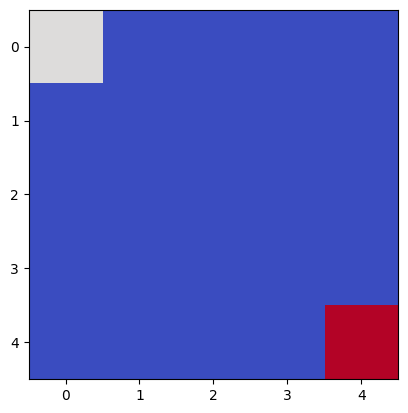

In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
# Overview of OpenAI Gym:
# OpenAI Gym is a toolkit for reinforcement learning (RL) that provides
# environments where agents can learn through interactions.

# Key Components:
# - **Environment**: The world in which the agent operates.
# - **Agent**: The learning entity.
# - **Actions**: The set of possible moves an agent can take.
# - **Observations**: The data received after performing an action.

#B setting up maze environment

class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()

        self.grid_size = 5  # 5x5 maze
        self.start_position = (0, 0)
        self.goal_position = (4, 4)
        self.state = self.start_position

        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = spaces.Discrete(4)

        # Observations: Agent's (x, y) position
        self.observation_space = spaces.Tuple((spaces.Discrete(self.grid_size), spaces.Discrete(self.grid_size)))

    def reset(self):
        self.state = self.start_position
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0 and x > 0:   # Up
            x -= 1
        elif action == 1 and x < self.grid_size - 1:  # Down
            x += 1
        elif action == 2 and y > 0:  # Left
            y -= 1
        elif action == 3 and y < self.grid_size - 1:  # Right
            y += 1

        self.state = (x, y)
        reward = 1 if self.state == self.goal_position else -0.01
        done = self.state == self.goal_position

        return self.state, reward, done, {}

    def render(self):
        maze = np.zeros((self.grid_size, self.grid_size))
        maze[self.goal_position] = 2  # Goal
        maze[self.state] = 1  # Agent
        plt.imshow(maze, cmap="coolwarm")
        plt.show()

# Create and test the environment
env = MazeEnv()
env.reset()
env.render()



In [ ]:
#DEFINING ACTIONS AND OBSERVATION


# Defining Actions:
# - Up: Move up (-1 row)
# - Down: Move down (+1 row)
# - Left: Move left (-1 column)
# - Right: Move right (+1 column)
actions = {
    0: "Up",
    1: "Down",
    2: "Left",
    3: "Right"
}

# Defining Observations:
# - The agent observes its current position (x, y)
# - Walls are implicitly handled by restricting movement beyond grid boundaries
state = env.reset()
print(f"Initial State: {state}")
for action in range(4):
    new_state, reward, done, _ = env.step(action)
    print(f"Action: {actions[action]}, New State: {new_state}, Reward: {reward}, Done: {done}")
    env.reset()  # Reset for next test


Initial State: (0, 0)
Action: Up, New State: (0, 0), Reward: -0.01, Done: False
Action: Down, New State: (1, 0), Reward: -0.01, Done: False
Action: Left, New State: (0, 0), Reward: -0.01, Done: False
Action: Right, New State: (0, 1), Reward: -0.01, Done: False


In [ ]:
#IMPLEMENTING Q LEARN ALGORITHM

# Q-Learning Implementation
q_table = np.zeros((env.grid_size, env.grid_size, env.action_space.n))  # Initialize Q-table

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99  # Decay for exploration

# Epsilon-Greedy Exploration
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit


In [ ]:
#TRAINING THE AGENT

# Training the agent using Q-Learning
num_episodes = 500
rewards_per_episode = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(50):  # Max steps per episode
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    global epsilon
    epsilon *= epsilon_decay  # Decay exploration

print("Training Completed!")


Training Completed!


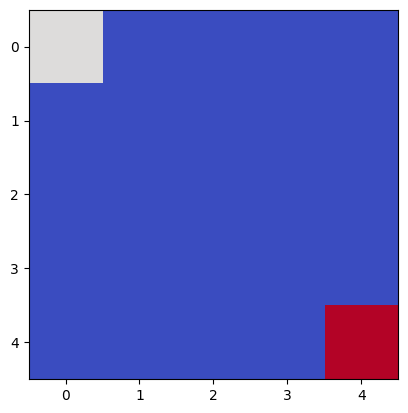

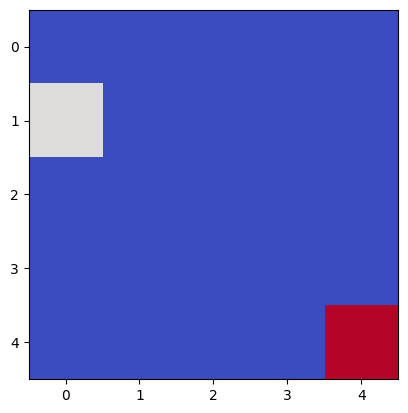

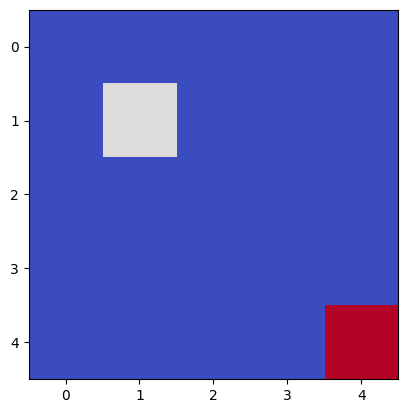

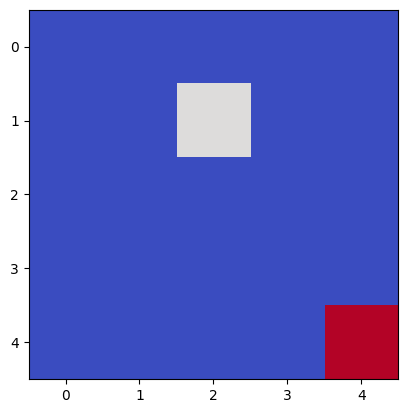

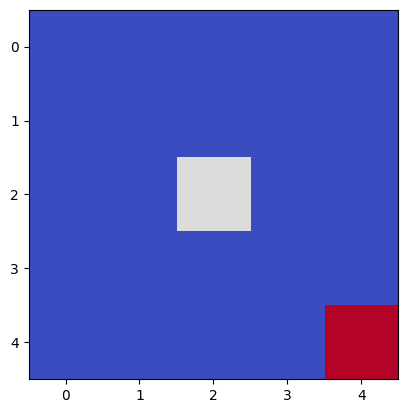

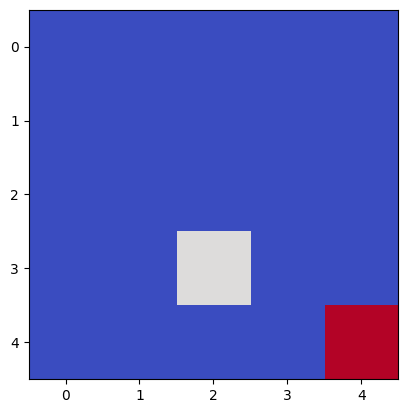

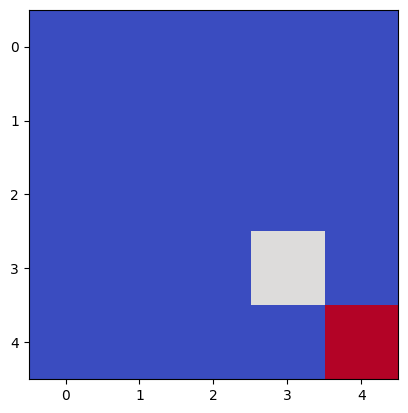

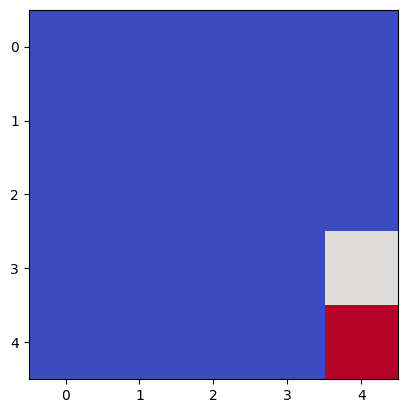

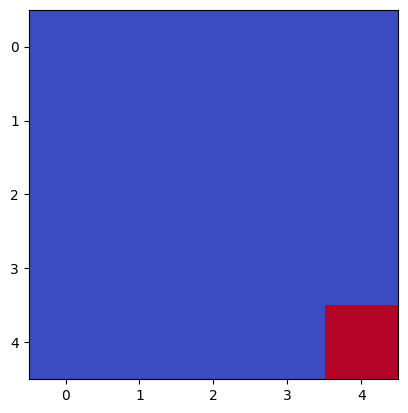

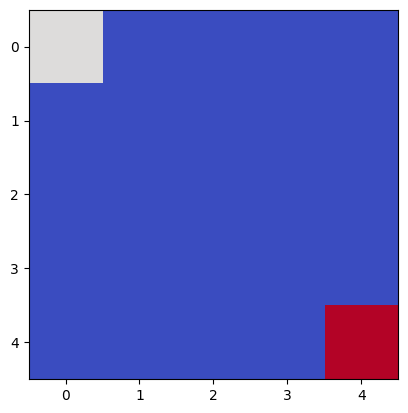

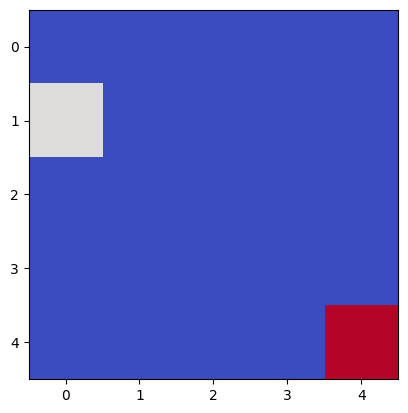

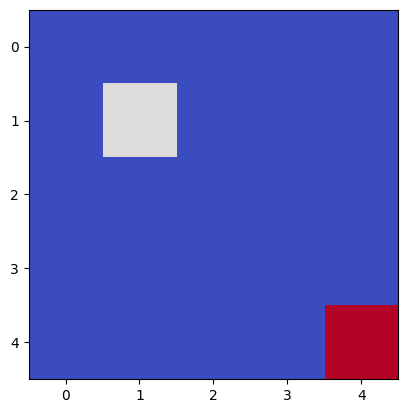

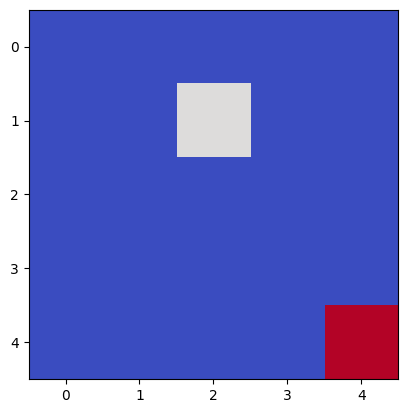

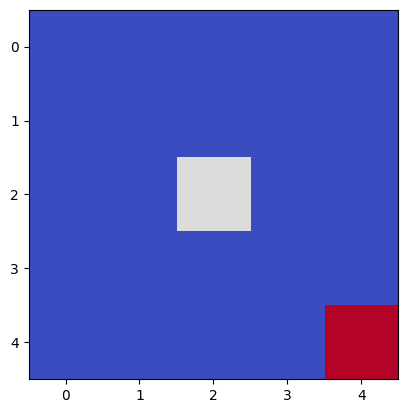

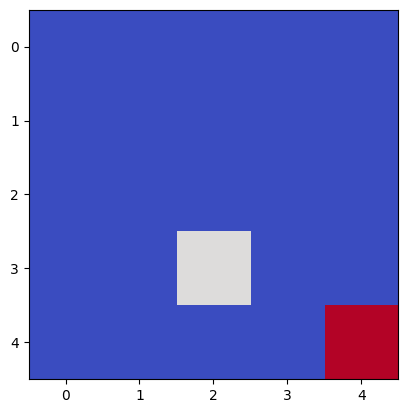

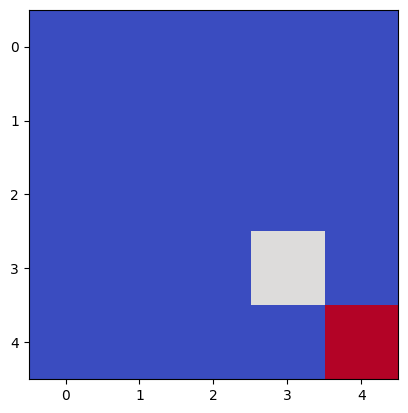

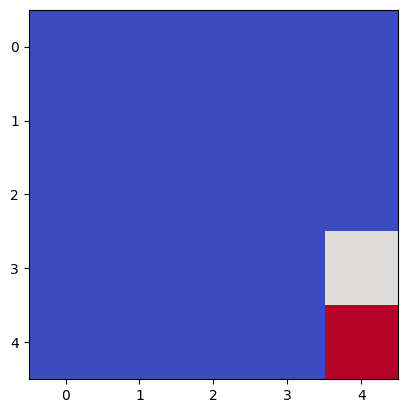

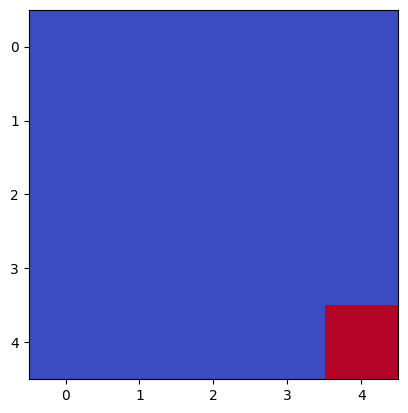

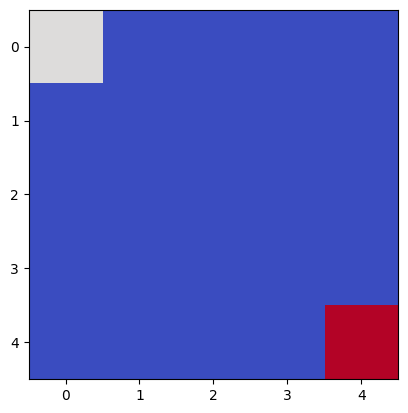

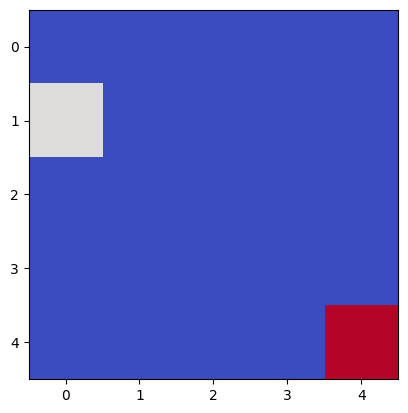

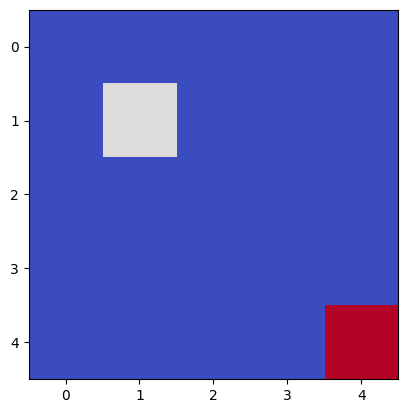

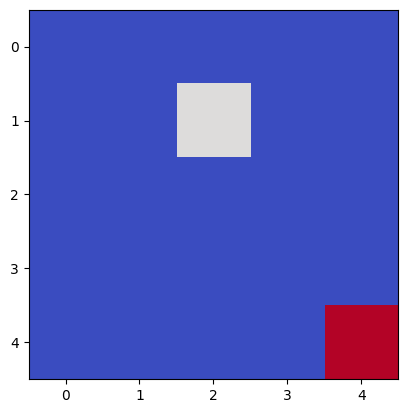

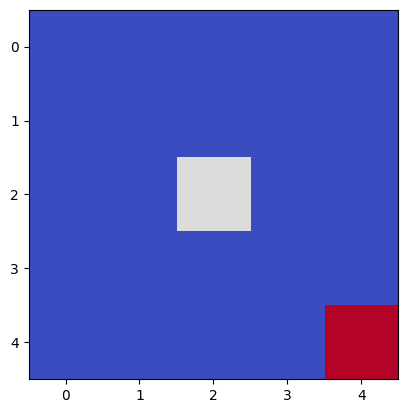

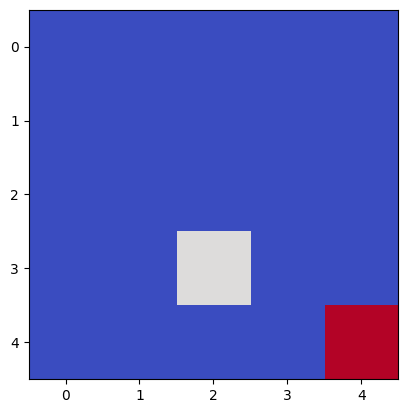

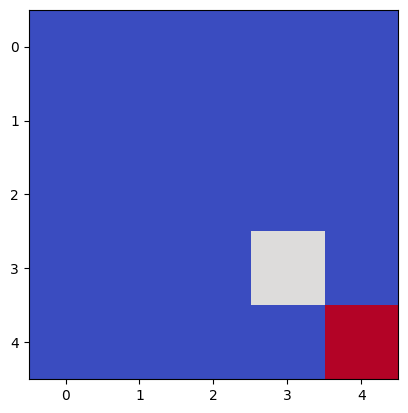

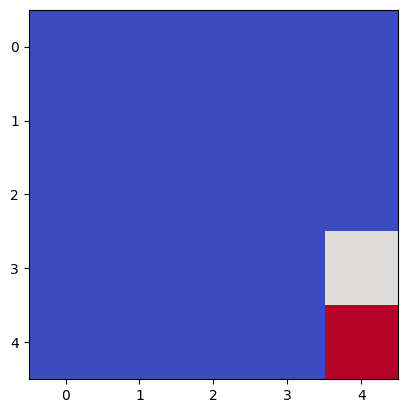

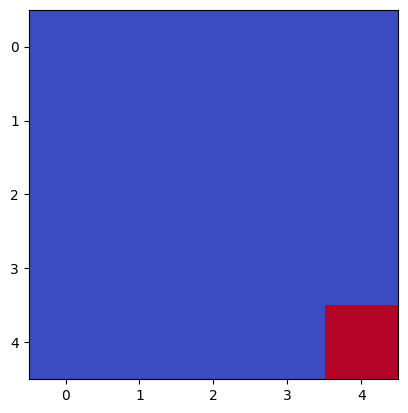

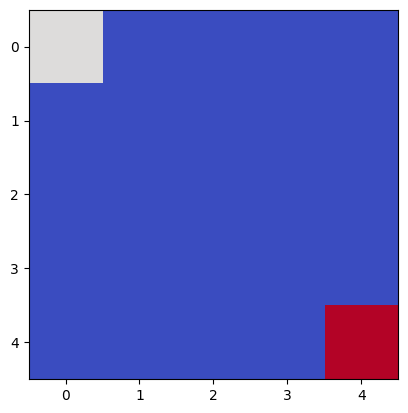

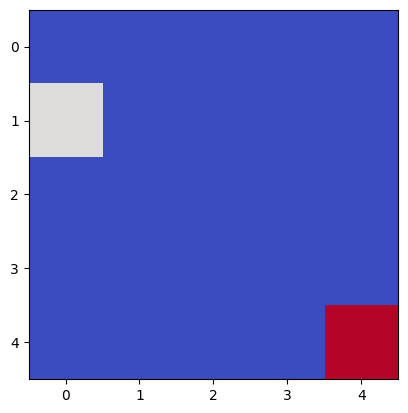

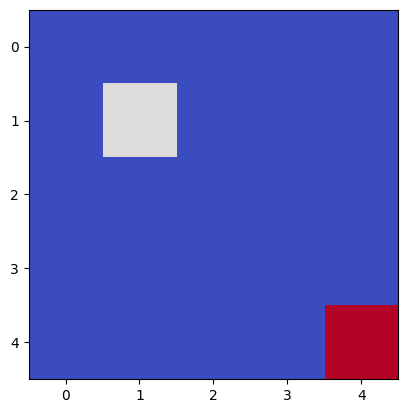

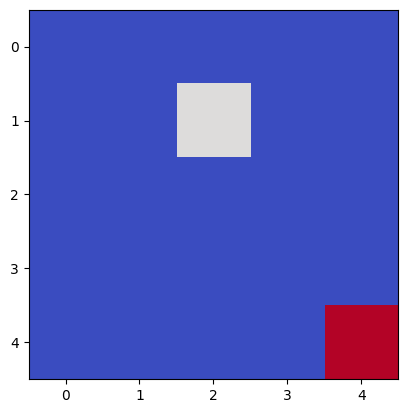

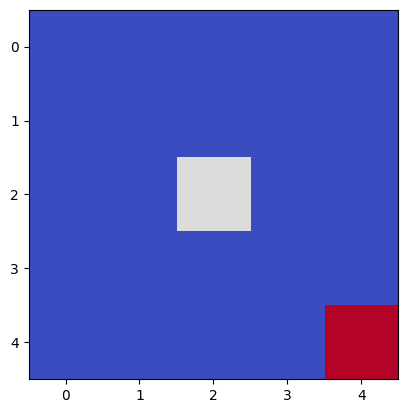

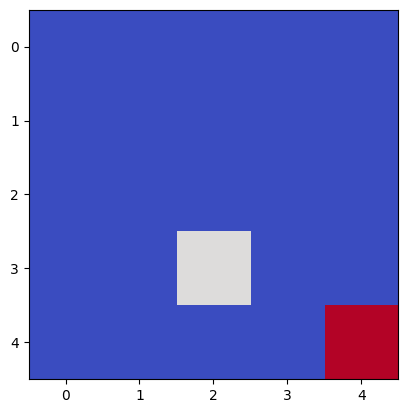

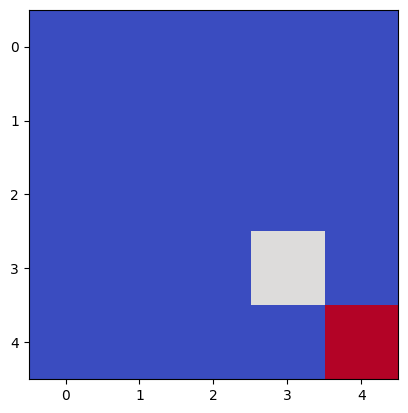

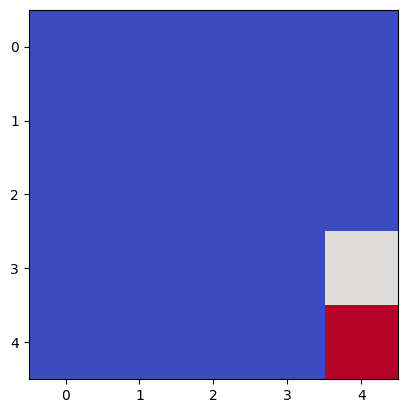

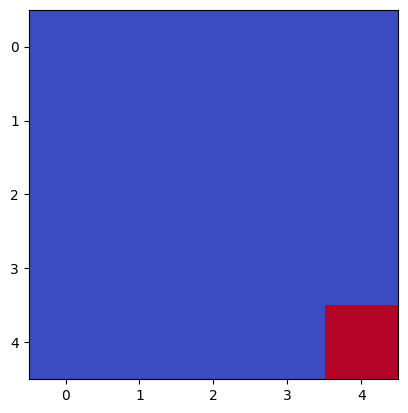

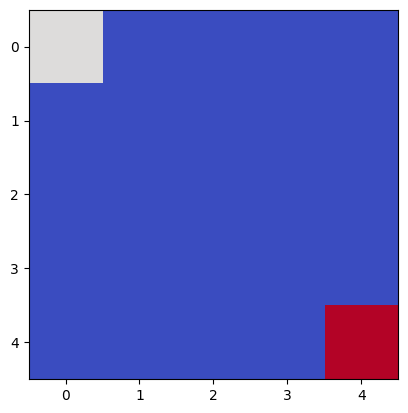

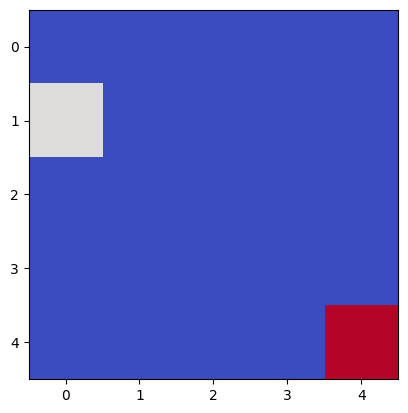

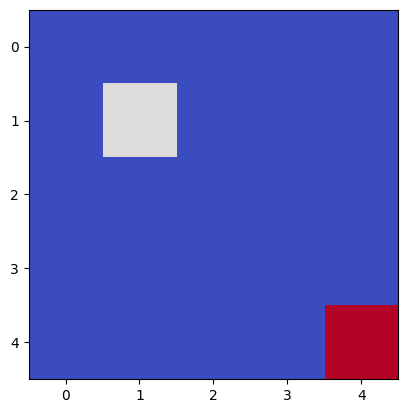

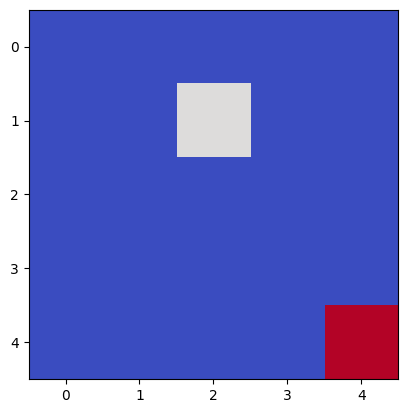

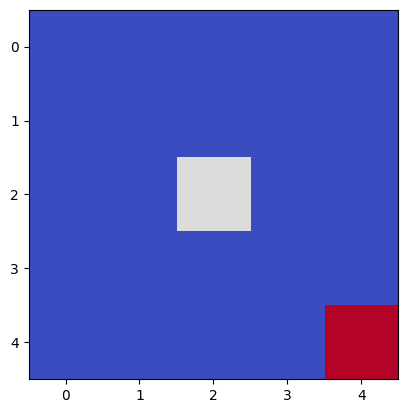

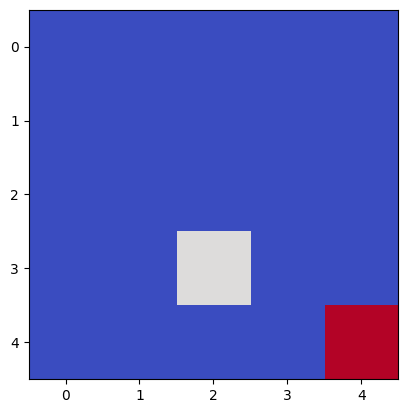

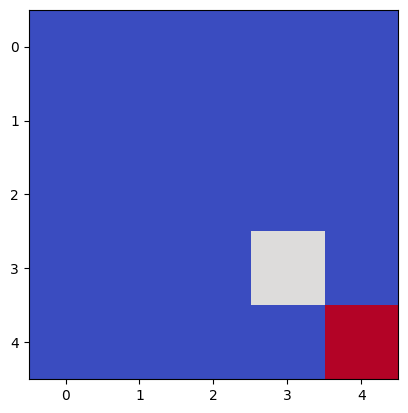

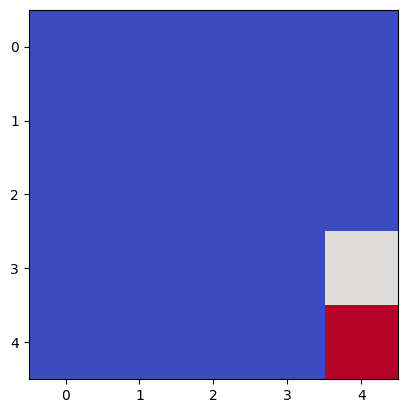

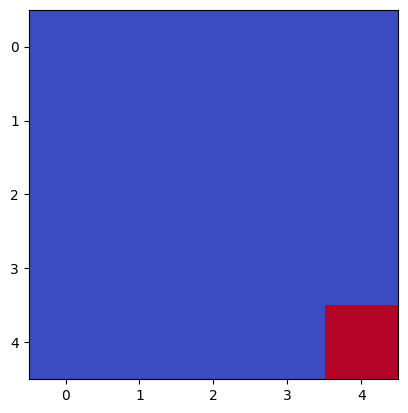

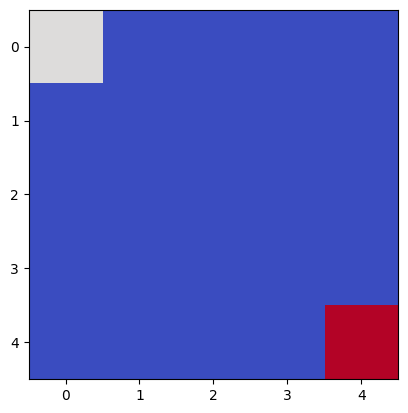

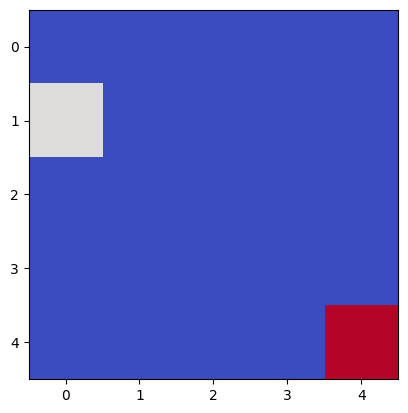

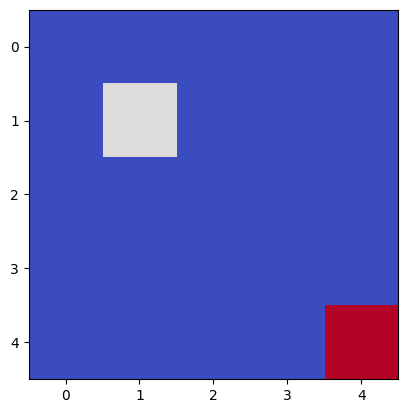

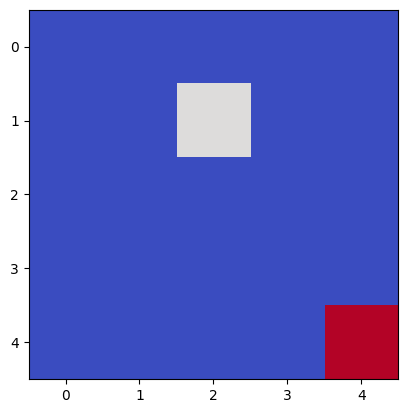

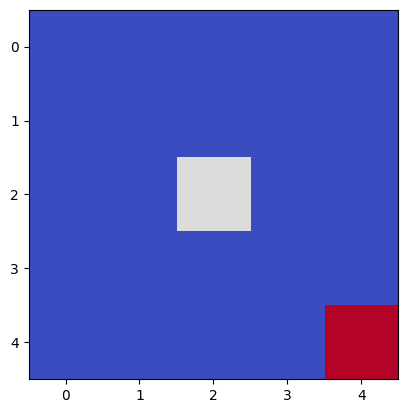

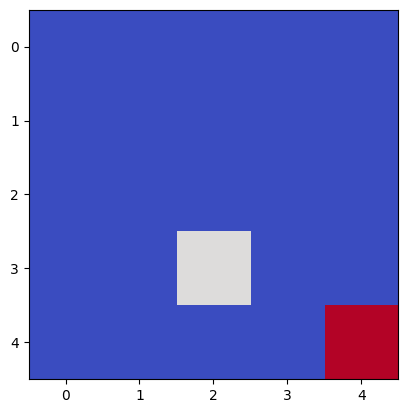

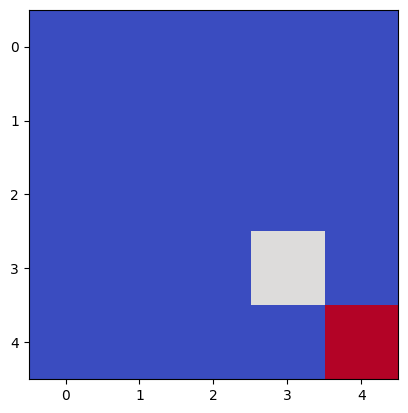

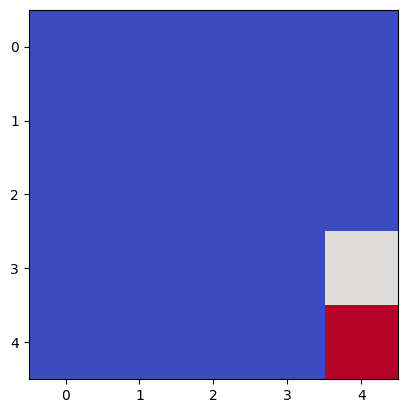

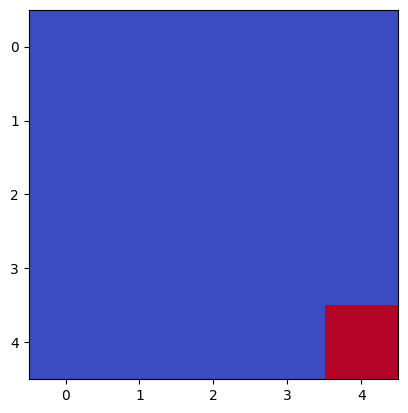

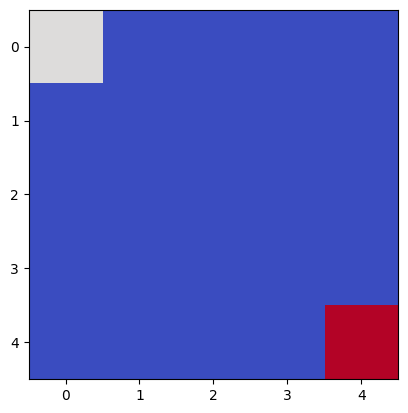

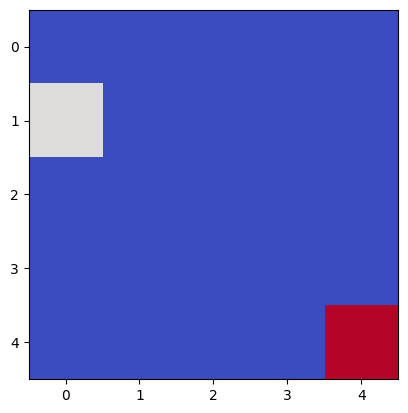

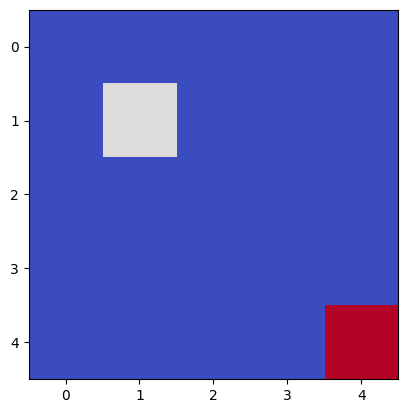

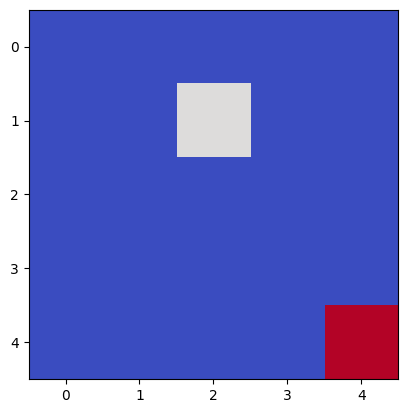

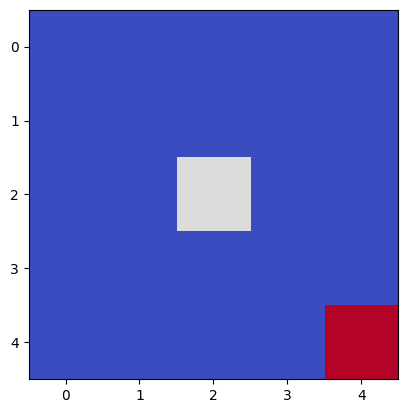

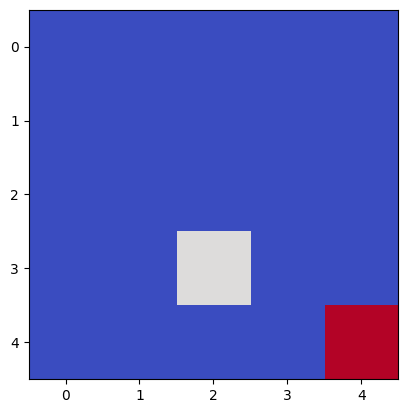

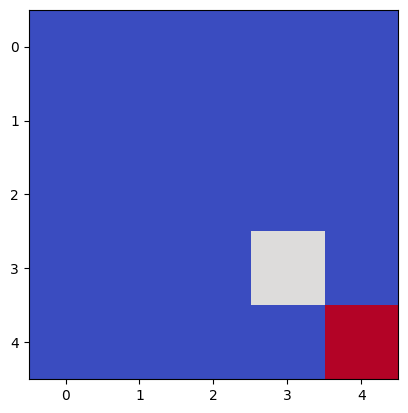

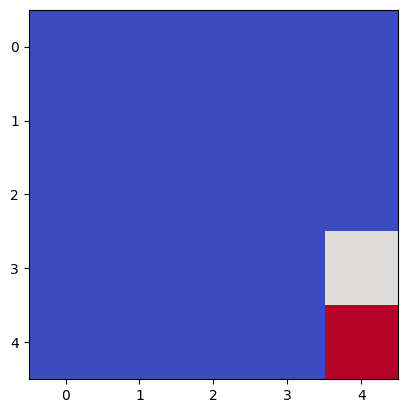

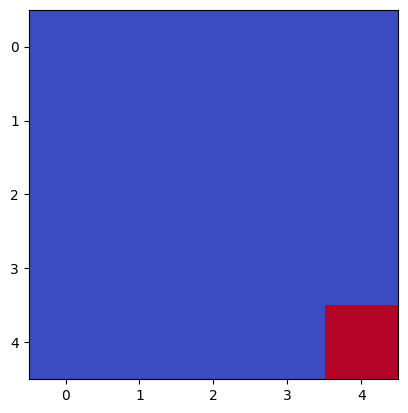

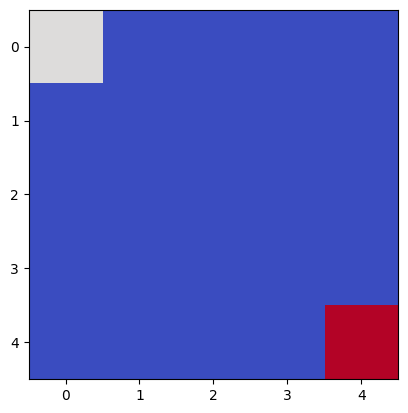

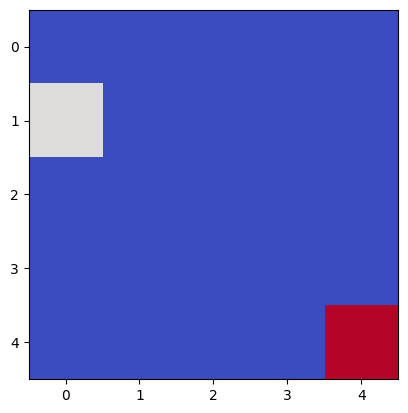

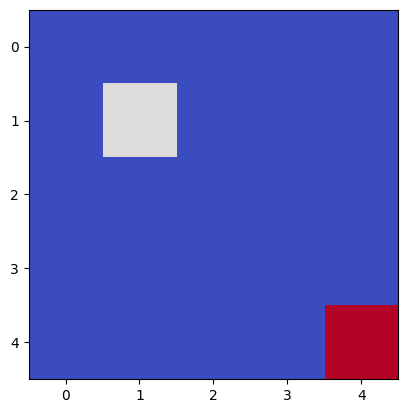

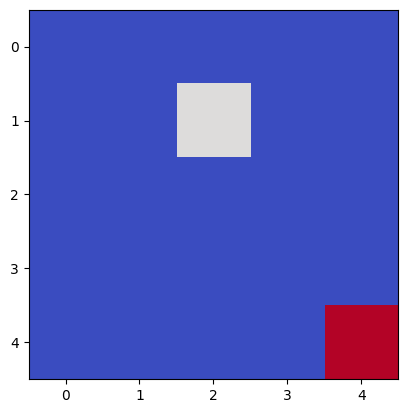

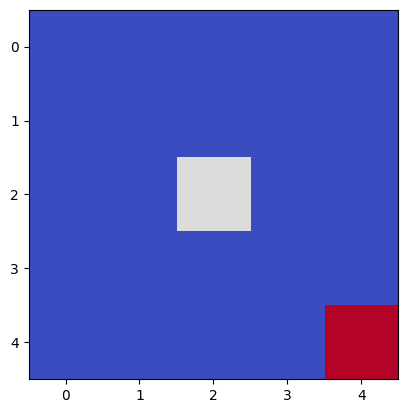

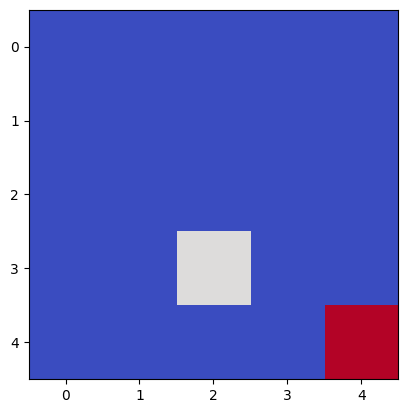

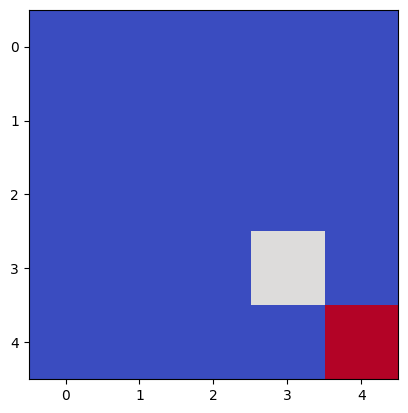

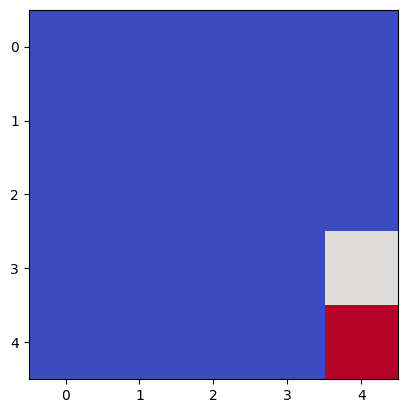

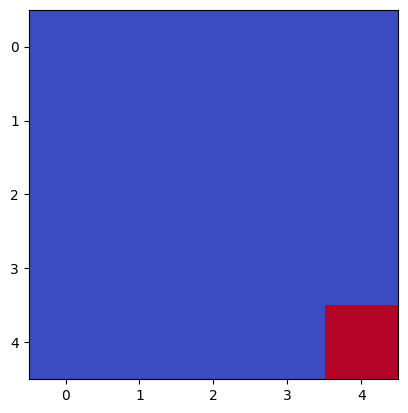

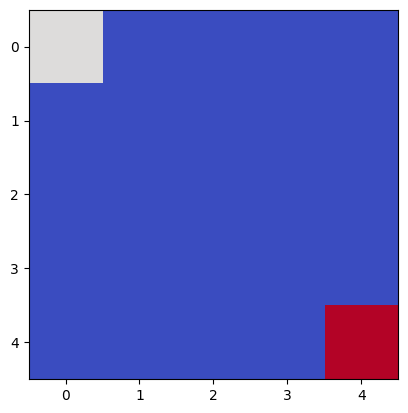

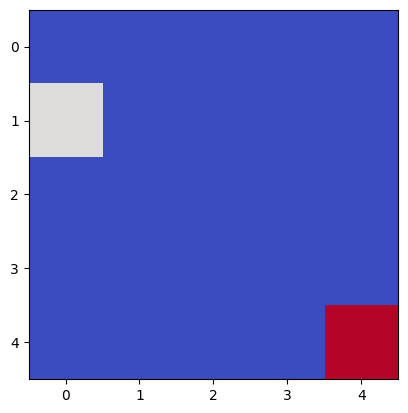

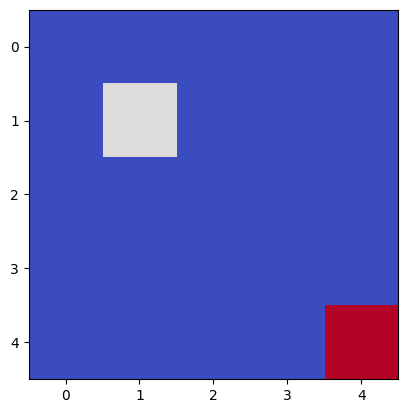

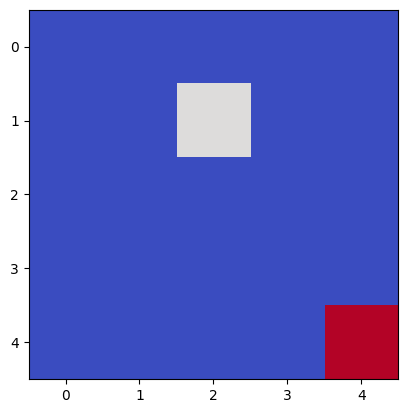

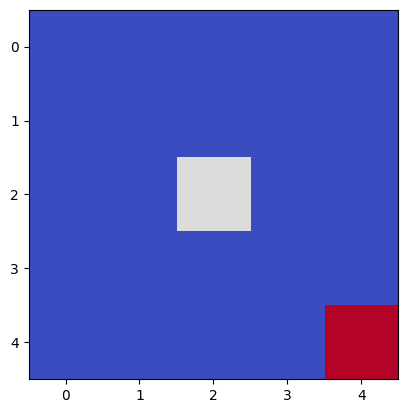

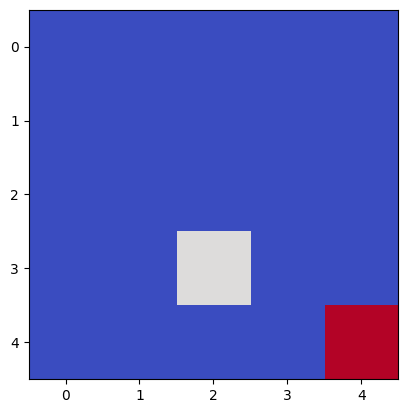

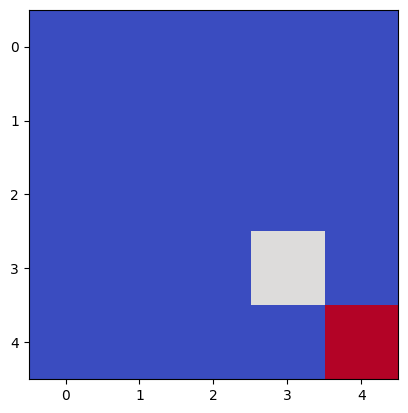

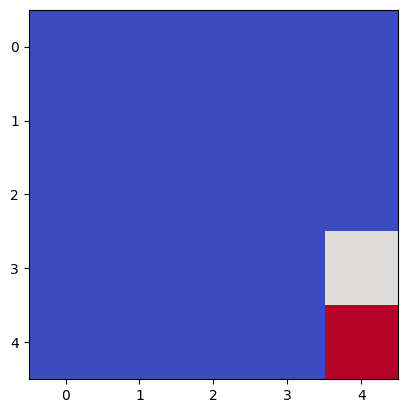

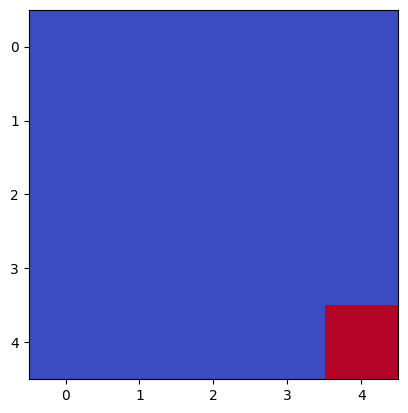

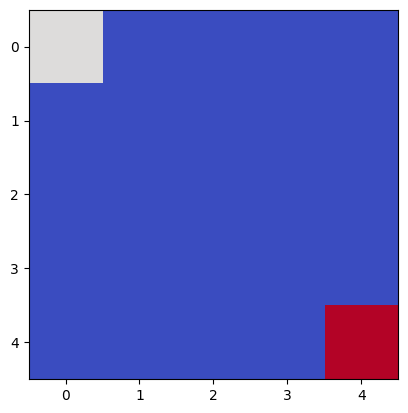

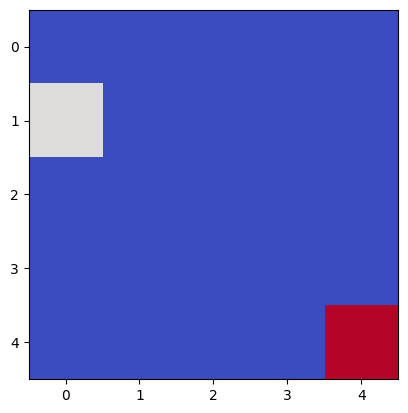

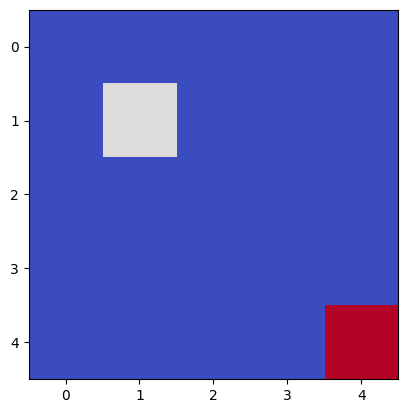

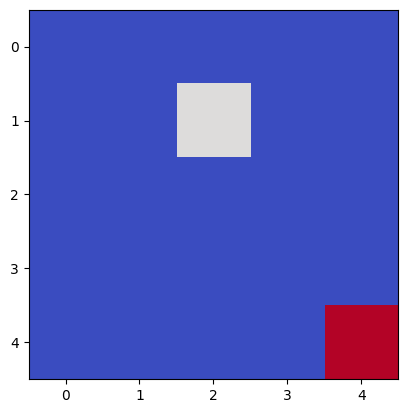

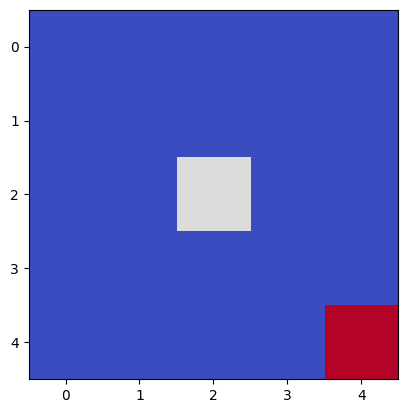

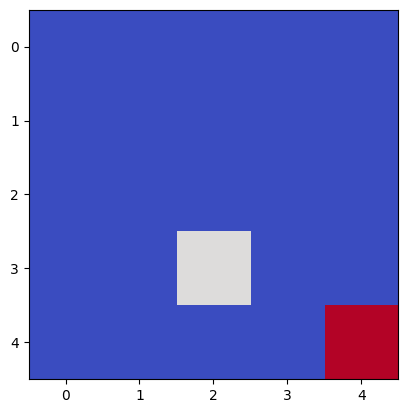

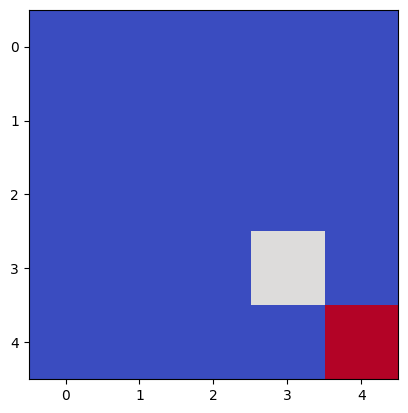

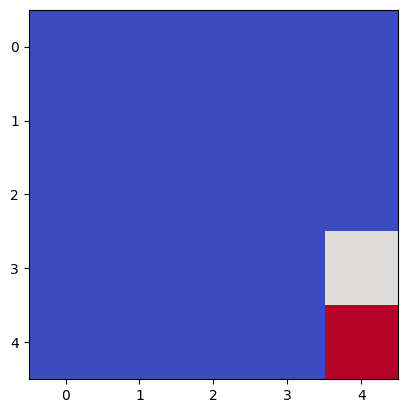

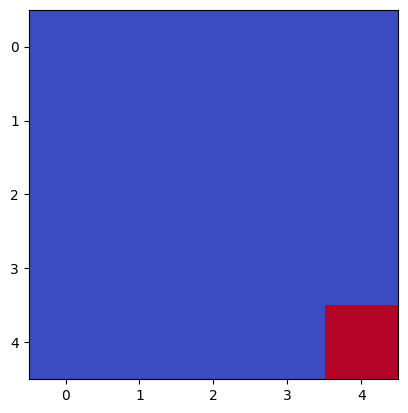

Success Rate: 10/10


In [ ]:
#EVALUATION AND TEXTING

# Evaluating the trained agent
test_episodes = 10
success_count = 0

for episode in range(test_episodes):
    state = env.reset()
    env.render()
    for step in range(50):
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)
        env.render()
        state = next_state
        if done:
            success_count += 1
            break

print(f"Success Rate: {success_count}/{test_episodes}")



In [ ]:
#EXTENSIONS AND IMPROV


# Experimenting with different hyperparameters
alternative_alpha = 0.2  # Higher learning rate
alternative_gamma = 0.95  # Higher discount factor

# Trying Deep Q-Learning (DQN) using TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Deep Q-Network
dqn_model = Sequential([
    Dense(24, input_shape=(2,), activation="relu"),
    Dense(24, activation="relu"),
    Dense(env.action_space.n, activation="linear")
])

dqn_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))


print("Deep Q-Learning model defined!")


Deep Q-Learning model defined!






# ***`QUESTION 8`***





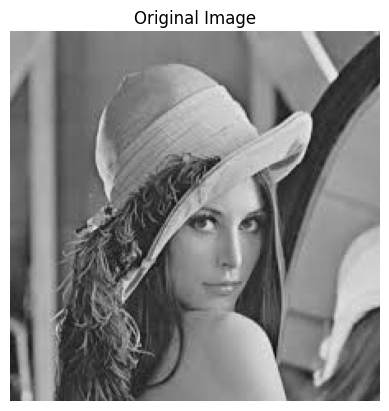

Blur Time: 0.0372s (Parallel: 0.0021s)
Sharpen Time: 0.0039s (Parallel: 0.0035s)
Edge Detection Time: 0.0097s (Parallel: 0.0064s)


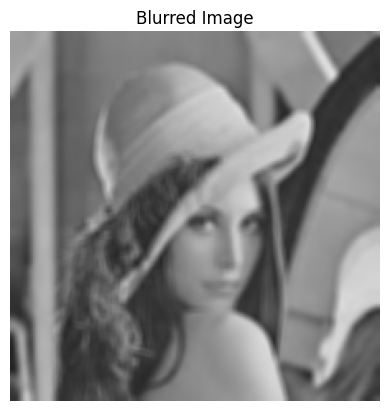

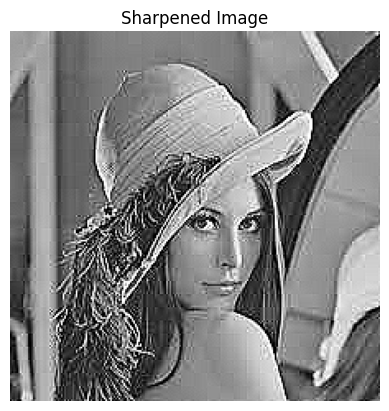

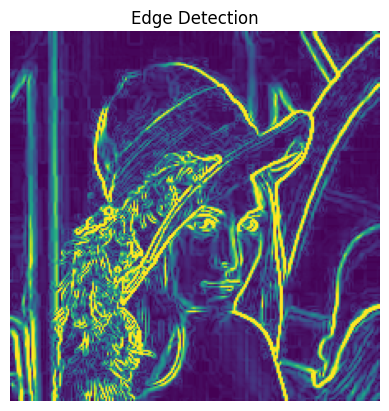

True

In [2]:
import cv2
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time
import numpy as np

# Load the image
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        raise FileNotFoundError("Image not found.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

image = load_image('/content/lenna.jpeg')  # Replace with your image path
display_image("Original Image", image)

# Image blurring
def blur_image(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

# Image sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Edge detection (Sobel operator)
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(edges)



def parallelize(image, func):
    with ThreadPoolExecutor() as executor:
        result = executor.submit(func, image)
        return result.result()

def measure_time(func, image):
    start = time.time()
    result = func(image)
    end = time.time()
    return result, end - start

# Without parallelization
blurred, blur_time = measure_time(blur_image, image)
sharpened, sharpen_time = measure_time(sharpen_image, image)
edges, edge_time = measure_time(edge_detection, image)

# With parallelization
blurred_parallel, blur_time_parallel = measure_time(lambda img: parallelize(img, blur_image), image)
sharpened_parallel, sharpen_time_parallel = measure_time(lambda img: parallelize(img, sharpen_image), image)
edges_parallel, edge_time_parallel = measure_time(lambda img: parallelize(img, edge_detection), image)

print(f"Blur Time: {blur_time:.4f}s (Parallel: {blur_time_parallel:.4f}s)")
print(f"Sharpen Time: {sharpen_time:.4f}s (Parallel: {sharpen_time_parallel:.4f}s)")
print(f"Edge Detection Time: {edge_time:.4f}s (Parallel: {edge_time_parallel:.4f}s)")

# Display processed images
display_image("Blurred Image", blurred)
display_image("Sharpened Image", sharpened)
display_image("Edge Detection", edges)

# Save images
cv2.imwrite('blurred.jpg', cv2.cvtColor(blurred, cv2.COLOR_RGB2BGR))
cv2.imwrite('sharpened.jpg', cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))
cv2.imwrite('edges.jpg', edges)

# **`question 9`**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to apply dimensionality reduction and evaluate using cross-validation
def evaluate_model(X_reduced, y, method_name, n_components):
    model = LogisticRegression(max_iter=2000)
    scores = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy')
    print(f"{method_name} ({n_components} components) - Accuracy: {np.mean(scores):.4f}")

# --- Case 1: Reduce to 2 Features ---
print("\n--- Dimensionality Reduction to 2 Features ---")
methods_2D = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "SVD": TruncatedSVD(n_components=2)
}

for name, method in methods_2D.items():
    X_reduced = method.fit_transform(X_scaled, y) if name == "LDA" else method.fit_transform(X_scaled)
    evaluate_model(X_reduced, y, name, 2)

# --- Case 2: Reduce to 3 Features ---
print("\n--- Dimensionality Reduction to 3 Features ---")
methods_3D = {
    "PCA": PCA(n_components=3),
    "t-SNE": TSNE(n_components=3, random_state=42),
    "SVD": TruncatedSVD(n_components=3)
}

# LDA Limitation Check
print("LDA cannot generate more than 2 components, so it is skipped for 3D.")

for name, method in methods_3D.items():
    X_reduced = method.fit_transform(X_scaled)
    evaluate_model(X_reduced, y, name, 3)



--- Dimensionality Reduction to 2 Features ---
PCA (2 components) - Accuracy: 0.9133
LDA (2 components) - Accuracy: 0.9800
t-SNE (2 components) - Accuracy: 0.8400
SVD (2 components) - Accuracy: 0.9133

--- Dimensionality Reduction to 3 Features ---
LDA cannot generate more than 2 components, so it is skipped for 3D.
PCA (3 components) - Accuracy: 0.9600
t-SNE (3 components) - Accuracy: 0.8800
SVD (3 components) - Accuracy: 0.9600


# ***`Question 12`***

In [1]:
!pip install --upgrade numpy==1.23.5 scipy==1.11.4 scikit-learn==1.3.2


K-means Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
K-medoids Medoids:
 [[-1.68665271  7.79344248]
 [-7.33898809 -7.72995396]
 [ 4.42219763  3.07194654]]
Fuzzy C-means Centroids:
 [[-2.63468297  9.04171187]
 [-6.89083823 -6.99495237]
 [ 4.7557504   2.00113144]]


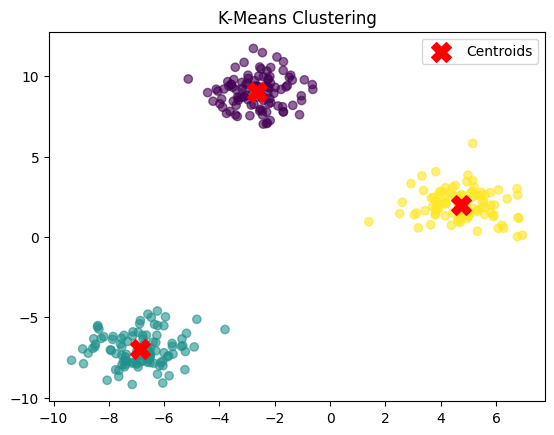

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist

def k_means(data, k, max_iter=100):
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        labels = pairwise_distances_argmin(data, centroids)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):  # More stable comparison
            break
        centroids = new_centroids

    return labels, centroids

def k_medoids(data, k, max_iter=100):
    np.random.seed(42)
    medoid_indices = np.random.choice(len(data), k, replace=False)
    medoids = data[medoid_indices]

    for _ in range(max_iter):
        distances = cdist(data, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)

        new_medoids = np.array([
            data[np.where(labels == i)[0]][np.argmin(
                np.sum(cdist([medoids[i]], data[np.where(labels == i)[0]], metric='euclidean'), axis=1)
            )] if len(np.where(labels == i)[0]) > 0 else medoids[i]
            for i in range(k)
        ])

        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

def fuzzy_c_means(data, k, m=2, max_iter=100, epsilon=1e-5):
    np.random.seed(42)
    n_samples, _ = data.shape
    u = np.random.rand(n_samples, k)
    u /= np.sum(u, axis=1, keepdims=True)

    for _ in range(max_iter):
        centroids = np.dot((u ** m).T, data) / np.sum(u ** m, axis=0, keepdims=True).T
        distances = cdist(data, centroids, metric='euclidean') + 1e-10  # Avoid divide by zero
        new_u = 1 / (distances ** (2 / (m - 1)))
        new_u /= np.sum(new_u, axis=1, keepdims=True)

        if np.linalg.norm(new_u - u) < epsilon:
            break
        u = new_u

    return u, centroids

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate synthetic dataset
    data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # K-means
    kmeans_labels, kmeans_centroids = k_means(data, k=3)
    print("K-means Centroids:\n", kmeans_centroids)

    # K-medoids
    kmedoids_labels, kmedoids_medoids = k_medoids(data, k=3)
    print("K-medoids Medoids:\n", kmedoids_medoids)

    # Fuzzy C-means
    fuzzy_membership, fuzzy_centroids = fuzzy_c_means(data, k=3)
    print("Fuzzy C-means Centroids:\n", fuzzy_centroids)

    # Visualization (K-Means)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.legend()
    plt.title("K-Means Clustering")
    plt.show()


# ***`Question 13`***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import all classifiers
from sklearn.utils import all_estimators
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [4]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Get all classifier models from sklearn
all_classifiers = all_estimators(type_filter='classifier')

results = []
for name, Model in all_classifiers:
    try:
        model = Model()
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        results.append((name, np.mean(scores)))
    except:
        pass  # Skip models that throw errors

# Sort classifiers by accuracy
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Select top 4 classifiers
top_4_classifiers = sorted_results[:4]
print("Top 4 Classifiers:", top_4_classifiers)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: Futu

Top 4 Classifiers: [('LinearDiscriminantAnalysis', 0.975), ('NuSVC', 0.975), ('QuadraticDiscriminantAnalysis', 0.975), ('GaussianProcessClassifier', 0.9666666666666668)]


In [6]:
#bagging

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))
print("Bagging Accuracy:", bagging_acc)


Bagging Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [7]:
#boosting
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_acc = accuracy_score(y_test, adaboost.predict(X_test))
print("AdaBoost Accuracy:", adaboost_acc)

gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print("Gradient Boosting Accuracy:", gbc_acc)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9333333333333333
Gradient Boosting Accuracy: 0.9666666666666667


In [8]:
#stacking


# Creating a stacking ensemble with top classifiers
stacking = StackingClassifier(
    estimators=[(top_4_classifiers[0][0], DecisionTreeClassifier()),
                (top_4_classifiers[1][0], SVC(probability=True)),
                (top_4_classifiers[2][0], LogisticRegression()),
                (top_4_classifiers[3][0], GradientBoostingClassifier())],
    final_estimator=LogisticRegression()
)

stacking.fit(X_train, y_train)
stacking_acc = accuracy_score(y_test, stacking.predict(X_test))
print("Stacking Accuracy:", stacking_acc)


Stacking Accuracy: 0.9666666666666667


In [9]:
print("\n--- Ensemble Method Accuracies ---")
print(f"Bagging Accuracy: {bagging_acc:.4f}")
print(f"AdaBoost Accuracy: {adaboost_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gbc_acc:.4f}")
print(f"Stacking Accuracy: {stacking_acc:.4f}")



--- Ensemble Method Accuracies ---
Bagging Accuracy: 0.9667
AdaBoost Accuracy: 0.9333
Gradient Boosting Accuracy: 0.9667
Stacking Accuracy: 0.9667
